In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import os

#Import python files. They have to be in the same folder as this notebook, if not you have to add the respective filepath.
import Segmentation_algorithms as seg
import ImageTreatment_and_interfaces as ii

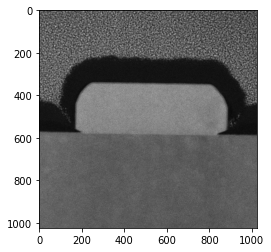

In [2]:
#Use the filepath of the sample you want to study
file_path = 'C:\\Users\\ipinto\\OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA\\PROGRAMMING\\dm3_Phases\\nanowire1_dm3.dm3'

#Charge the dm3 image
imgdm3 = hs.load(file_path)

#Convert the image in a numpy array and normalize
n_img = ii.normalize_image(np.asarray(imgdm3))

#Plot the image in gray scale
plt.imshow(n_img, cmap = 'gray')
plt.show()

In [3]:
#Downsampling the image to decrease the variance in intesnsities and make faster the process
number_of_pixels = 256
reduce_image = seg.reduce_image(n_img, number_of_pixels)

#Prepare the data to apply UML algorithms (not necessary for Canny algorithm)
scale = 5 #rescaling the relevance of the intensitie in the 3D data
X = seg.dm3_to_data(reduce_image, scale)

# Canny edge detection

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cfcd80a520>)

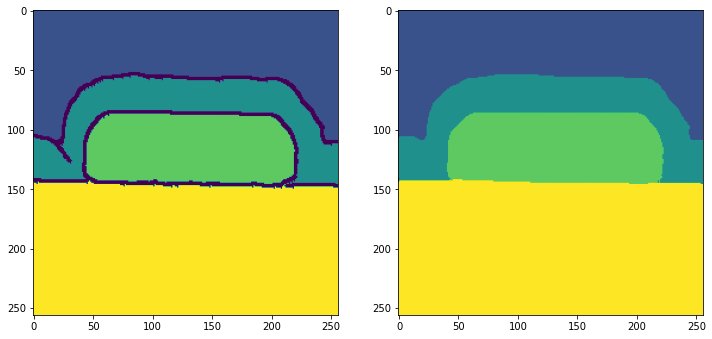

In [4]:
#Canny edge detection algorithm
sigma = 13 #To gaussian filtter, in some cases is better lower values
border_size = 2 # In some samples is required bigger borders
vmax = 50 #Hyperparameter that depends on sample size
labels_canny = seg.border(reduce_image, sigma, border_size,  vmax)

#Remove posible noise
labels_wout_noise_canny = seg.reagrupar(labels_canny) 

#Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(121),plt.imshow(labels_canny)
plt.subplot(122),plt.imshow(labels_wout_noise_canny) 

# K-means

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cfcfc201f0>)

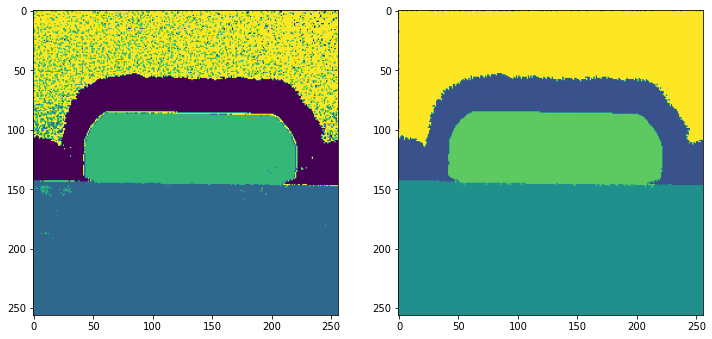

In [5]:
#K-means algorithm
number_of_clusters = 4
labels_km = seg.k_means(X, number_of_clusters)

#Remove posible noise
labels_wout_noise_km = seg.reagrupar(labels_km)

#Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(121),plt.imshow(labels_km)
plt.subplot(122),plt.imshow(labels_wout_noise_km) 

# DBSCAN


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1cfcfcb2700>)

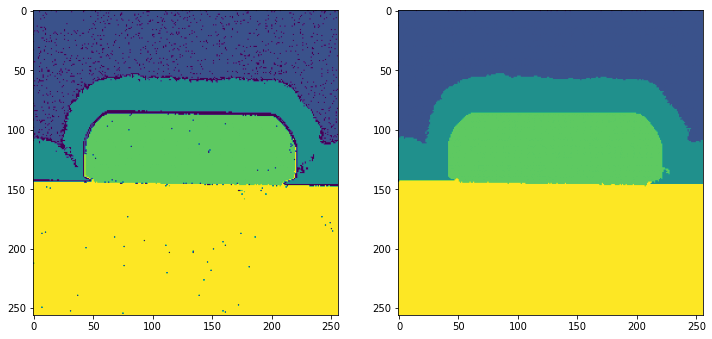

In [6]:
#DBSCAN algorithm
radious = 0.1 #Usually this is costant and we change the value of number_of_neightbour_points
number_of_neightbour_points = 50
labels_db = seg.dbscan(X, radious, number_of_neightbour_points)

#Remove posible noise
labels_wout_noise_db = seg.reagrupar(labels_db)

#Plotting results
plt.figure(figsize=(12, 6))
plt.subplot(121),plt.imshow(labels_db)
plt.subplot(122),plt.imshow(labels_wout_noise_db) 

# Compare all models

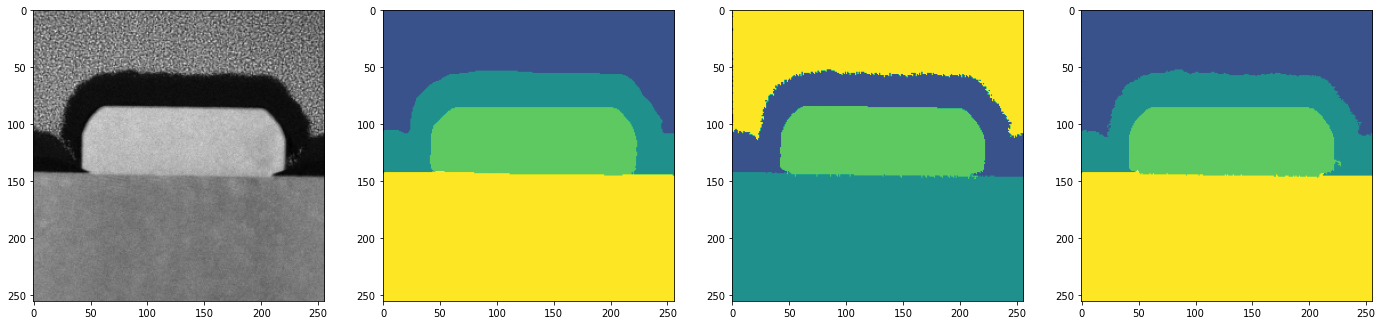

In [7]:
#Plot the results
plt.figure(figsize=(24, 6))
plt.subplot(141),plt.imshow(reduce_image, cmap = 'gray')
plt.subplot(142),plt.imshow(labels_wout_noise_canny)
plt.subplot(143),plt.imshow(labels_wout_noise_km) 
plt.subplot(144),plt.imshow(labels_wout_noise_db)  
plt.show()

# Automate segmentation

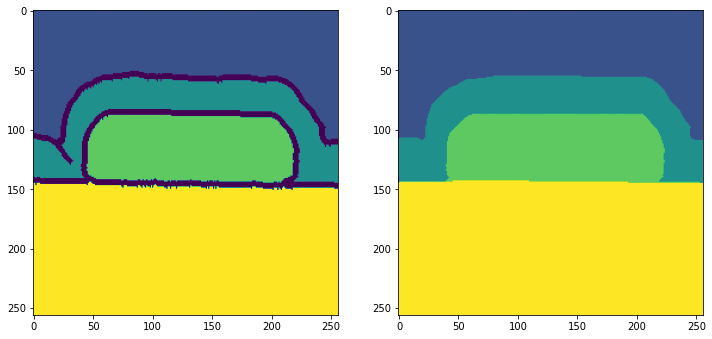

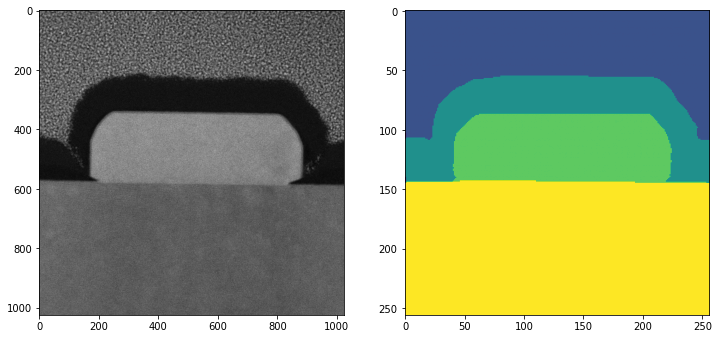

In [10]:
#Use the folderpath of the samples you want to study
folder_path = 'C:\\Users\\ipinto\\OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA\\PROGRAMMING\\dm3_Phases'
files = os.listdir(folder_path)
files = [file for file in files if file.endswith('.dm3')]
file = files[8]

#Charge the dm3 image
imgdm3 = hs.load(folder_path + '/' + file)

#Automated segmentation
n_pixels = 256
image_segmented = seg.automate_segmentation(imgdm3, number_of_pixels = n_pixels, plot = False)


#Plot
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(imgdm3, cmap = 'gray')
plt.subplot(122),plt.imshow(image_segmented)
plt.show()